<a href="https://colab.research.google.com/github/star3960/Data-Analysys-Programmi/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **0. 개요**
주택 정보와 가격을 분석해 주택 가격에 영향을 주는 요소를 알아보고자 한다. </br>
분석은 데이터 준비, 보기, 클린징, 탐색, 시각화 순으로 진행하고, T 검정, 회귀분석 및 상관분석, K-최근접 이웃을 실행한 후 결론을 도출한다.

## **1. 데이터 준비**

데이터 분석 시 사용할 라이브러리와 데이터를 준비한다. </br>
데이터는 kaggle의 'House Sales in King County, USA'를 사용한다. 출처는 아래 링크와 같다. </br>
https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [1]:
# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 import
file_path = 'kc_house_data.csv'

house_df_org = pd.read_csv(file_path)       # 원본 데이터
house_df = house_df_org.copy(deep = True)   # 데이터 백업

## **2. 데이터 보기**
데이터의 기본 정보와 통계 요약 정보를 확인한다. 확인 가능한 변수 정보는 아래와 같다.  </br>
view, condition, grade는 값이 높을수록 좋은 평가를 받았다는 것을 의미한다.

|변수|설명|유형|비고|
|---|---|---|---|
|id|주택 구분 번호|int|
|date|거래 날짜|object|
|price|주택 가격|float|
|bedrooms|침실 개수|int|
|bathrooms|욕실 개수|float|
|sqft_living|주택 면적|int|
|sqft_lot|토지 면적|int|
|floors|주택 층수|float|
|waterfront|강변 전망 유무|int|강변 전망이면 1, 아니면 0|
|view|전망 점수|int|0 - 4|
|condition|주택 상태|int|1 - 5|
|grade|King Country 평가 시스템에 따른 주택 등급|int|1 - 13|
|sqft_above|지하실 제외 면적|int|
|sqft_basement|지하실 면적|int|
|yr_built|건축 년도|int|
|yr_renovated|재건축 년도|int|
|zipcode|우편 번호|int|
|lat|위도|float|
|long|경도|float|
|sqft_living15|근방 15 가구의 주택 면적 평균|int|
|sqft_lot15|근방 15 가구의 토지 면적 평균|int|

이후 첫번째 데이터와 상위 5개의 데이터를 추출해 실제 변수값을 확인한다. </br>

In [2]:
# 기본 정보 확인
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
# 통계 요약 정보 확인
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# 첫번째 데이터 추출을 통한 실제 변수값 확인
house_df.loc[0]

id                    7129300520
date             20141013T000000
price                   221900.0
bedrooms                       3
bathrooms                    1.0
sqft_living                 1180
sqft_lot                    5650
floors                       1.0
waterfront                     0
view                           0
condition                      3
grade                          7
sqft_above                  1180
sqft_basement                  0
yr_built                    1955
yr_renovated                   0
zipcode                    98178
lat                      47.5112
long                    -122.257
sqft_living15               1340
sqft_lot15                  5650
Name: 0, dtype: object

In [5]:
# 상위 데이터 추출을 통한 실제 변수값 확인
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## **3. 데이터 클린징**
데이터에 결측값과 중복값이 존재하지 않으므로 데이터 클린징 과정은 생략한다. </br>

In [6]:
# 결측값 확인 → 결측값 X
house_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
# 중복값 확인 → 중복값 X
house_df.duplicated().sum()

0

## **4. 데이터 탐색**
전망 점수와 주택 상태에 따른 가격 평균을 그룹 분석한다. 이를 통해 전망 점수와 주택 상태가 좋을수록 평균 가격이 높다는 것을 알 수 있다. </br>
연속형 변수인 주택 면적을 4개의 동일한 개수로 구간화 (범주형 변수로 재구조화)해 주택 면적에 따른 가격 평균을 그룹 분석한다. 이를 통해 주택 면적 넓을수록 평균 가격이 높다는 것을 알 수 있다. </br>
다음으로 연속형 변수인 건축 년도를  건축 년도를 4개의 동일한 개수로 구간화해 건축 년도에 따른 가격 평균을 그룹 분석한다. 이를 통해 건축 년도에 따른 평균 가격이 비슷하다는 것을 알 수 있다. </br>
마지막으로 범주형 - 범주형 분석과 범주형 - 연속형 분석에 사용하기 위해 주택 가격을 5개의 동일한 개수로 구간화한다.

In [8]:
# 전망 점수에 따른 가격 평균 확인
# 전망 점수가 높을수록 평균 가격이 높음
house_df.pivot_table(['price'],index=['view'], aggfunc='mean')

,price
view,
0,4.965642e+05
1,8.122808e+05
2,7.924009e+05
3,9.719653e+05
4,1.463711e+06


In [9]:
# 주택 상태에 따른 가격 평균 확인
# 주택 상태가 좋을수록 평균 가격이 높음.
house_df.pivot_table(['price'],index=['condition'], aggfunc='mean')

,price
condition,
1,334431.666667
2,327287.145349
3,542012.578148
4,521200.390033
5,612418.089359


In [10]:
# 주택 면적을 4개의 동일한 개수로 구간화 (0 - 3)
sqft_living_df = pd.qcut(house_df.sqft_living, 4, labels =[0, 1, 2, 3])

# 주택 면적에 따른 가격 평균 확인
# 주택 면적 넓을수록 평균 가격이 높음
house_df['sqft_living_class'] = sqft_living_df
house_df.pivot_table(['price'],index=['sqft_living_class'], aggfunc='mean')

,price
sqft_living_class,
0,339014.843264
1,421805.072194
2,521473.766102
3,881265.922560


In [11]:
# 건축 년도를 4개의 동일한 개수로 구간화 (0 - 3)
yr_built_df = pd.qcut(house_df.yr_built, 4, labels =[0, 1, 2, 3])

# 건축 년도에 따른 가격 평균 확인
# 건축 년도에 따른 평균 가격이 비슷함
house_df['yr_built_class'] = yr_built_df
house_df.pivot_table(['price'],index=['yr_built_class'], aggfunc='mean')

,price
yr_built_class,
0,543934.788220
1,468738.772744
2,532868.851551
3,618365.180885


In [12]:
# 가격을 5개의 동일한 개수로 구간화 (0 - 4)
price_df = pd.qcut(house_df.price, 5, labels =[0, 1, 2, 3, 4])
house_df['price_class'] = price_df

## **5. 데이터 시각화**
단일 범주형 변수 분석으로 강변 전망 유무, 전망 점수, 주택 상태, 주택 등급의 분포를 확인한다. 이를 통해 강변 전망이 아니고 전망 점수가 낮은 주택이 대부분이란 것을 확인할 수 있다. 주택 상태는 3 - 4에, 주택 등급은 6 - 9에 대부분이 분포해 있다. </br>
단일 연속형 변수 분석으로 침실과 욕실 개수, 주택 층수, 주택과 토지 면적, 가격의 분포를 확인한다. 이를 통해 확인할 수 있는 건 다음과 같다. 대부분 침실 개수는 6개 이하, 욕실 개수는 4개 이하다. 또한 주택 층수는 1층이나 2층이다. 대부분이 주택 면적은 4,000 피트 이하이고 토지 면적은 250,000 이하이다. 가격은 100,000 이하이다. </br>
주택 가격 - 주택 등급 분석을 통해 주택 가격이 높을수록 높은 주택 등급이 많이 존재한다는 것을 알 수 있다. 다음으로 주택 가격 - 주택 상태 분석을 통해 주택 가격에 따라 다양한 주택 상태가 고르게 분포해 있으나, 높은 가격에 상태 좋은 주택이 더 많이 존재한다는 것을 확인할 수 있다. </br>
주택 가격 - 욕실 개수 분석을 통해 주택 가격이 가장 낮은 경우 대부분 1개의 욕실을 가지고, 그 외는 1개 이상 4개 미만의 욕실 개수가 고르게 나타난다는 것을 알 수 있다. 단 주택 가격이 가장 높은 경우는 대부분 2개 이상의 욕실을 가지며 4개 이상을 가지는 주택도 있었다.두 번째로 주택 가격 - 침실 개수 분석을 통해 주택 가격에 따른 침실 개수 분포엔 큰 차이가 없다는 것을 알 수 있었다. 마지막으로 주택 가격 - 주택 면적 분석을 통해 가격이 높을수록 주택 면적이 넓다는 것을 확인했다. </br>

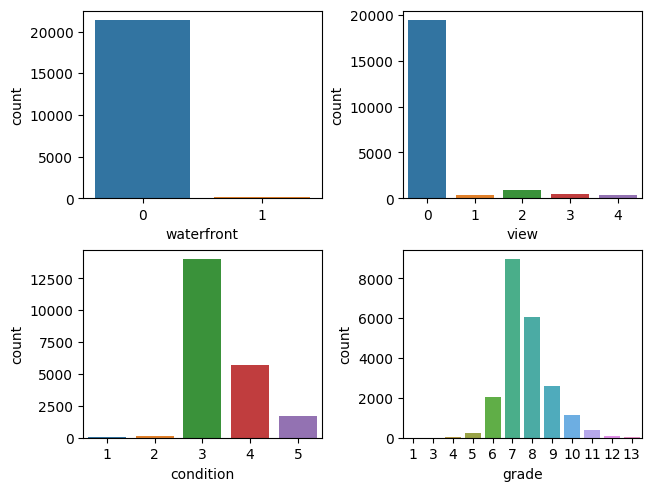

In [13]:
# 단일 범주형 변수 분석
fig, axs = plt.subplots(2, 2, constrained_layout = True)

sns.countplot(x = 'waterfront', data = house_df, ax = axs[0, 0])    # 강변 전망 유무 분포
sns.countplot(x = 'view', data = house_df, ax = axs[0, 1])          # 전망 점수 분포
sns.countplot(x = 'condition', data = house_df, ax = axs[1, 0])     # 주택 상태 분포
sns.countplot(x = 'grade', data = house_df, ax = axs[1, 1])         # 주택 등급 분포

plt.show()

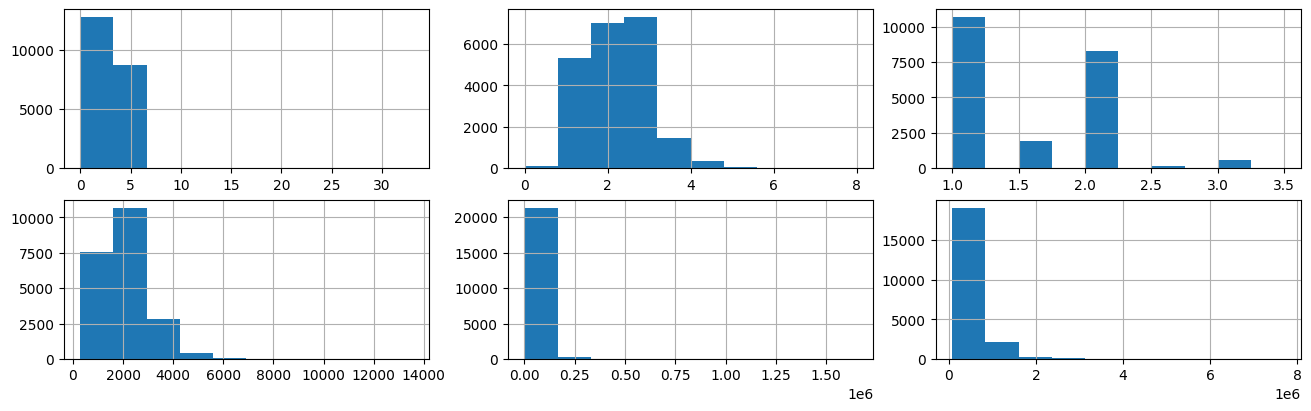

In [14]:
# 단일 연속형 변수 분석
fig2, axs2 = plt.subplots(2, 3, figsize = (13, 4), constrained_layout = True)

house_df['bedrooms'].hist(ax = axs2[0, 0])    # 침실 개수 분포
house_df['bathrooms'].hist(ax = axs2[0, 1])   # 욕실 개수 분포
house_df['floors'].hist(ax = axs2[0, 2])      # 층수 분포

house_df['sqft_living'].hist(ax = axs2[1, 0]) # 주택 면적 분포
house_df['sqft_lot'].hist(ax = axs2[1, 1])    # 토지 면적 분포
house_df['price'].hist(ax = axs2[1, 2])       # 가격 분포

plt.show()

<Axes: xlabel='price_class', ylabel='count'>

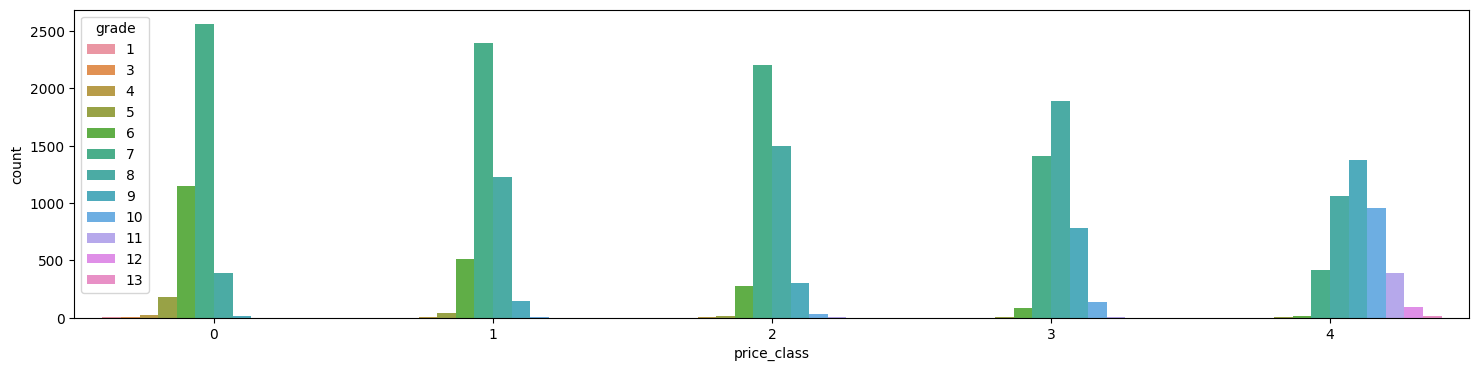

In [15]:
# 주택 가격 - 주택 등급 분석
fig3, axs3 = plt.subplots(figsize = (18, 4))
sns.countplot(x = 'price_class', hue = 'grade', data = house_df, ax = axs3)

<Axes: xlabel='price_class', ylabel='count'>

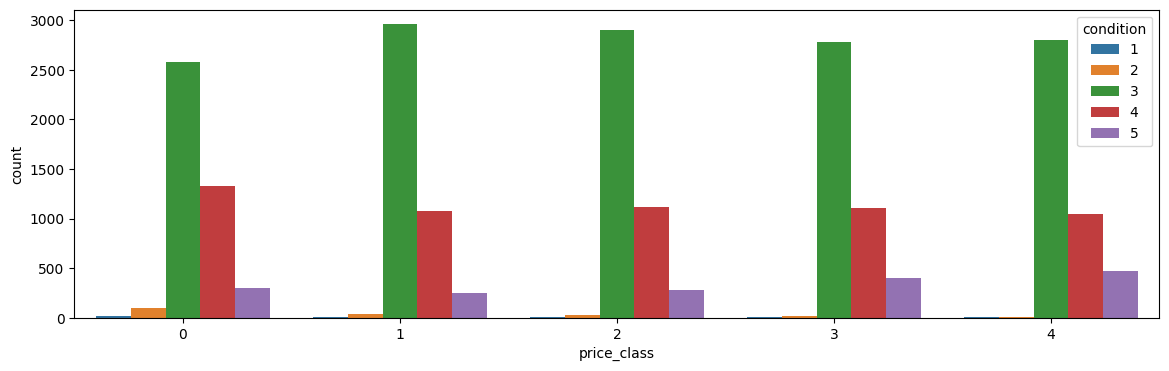

In [16]:
# 주택 가격 - 주택 상태 분석
fig4, axs4 = plt.subplots(figsize = (14, 4))
sns.countplot(x = 'price_class', hue = 'condition', data = house_df, ax = axs4)

<ipython-input-17-0fb1fdad0d6f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['bathrooms'].loc[house_df['price_class'] == 0], ax = axs5[0, 0])
<ipython-input-17-0fb1fdad0d6f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['bathrooms'].loc[house_df['price_class'] == 1], ax 

<Axes: xlabel='bathrooms', ylabel='Density'>

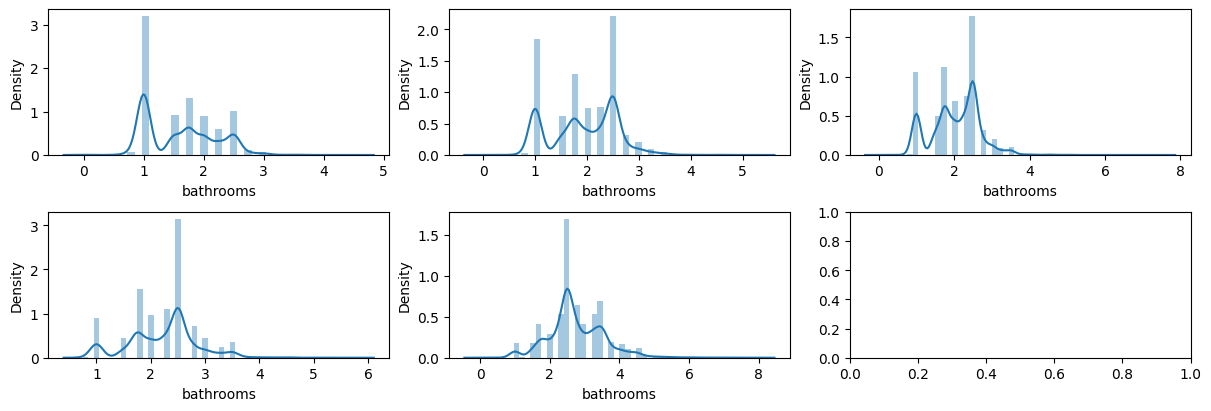

In [17]:
# 주택 가격 - 욕실 개수 분석
fig5, axs5 = plt.subplots(2, 3, figsize = (12, 4), constrained_layout = True)

sns.distplot(house_df['bathrooms'].loc[house_df['price_class'] == 0], ax = axs5[0, 0])
sns.distplot(house_df['bathrooms'].loc[house_df['price_class'] == 1], ax = axs5[0, 1])
sns.distplot(house_df['bathrooms'].loc[house_df['price_class'] == 2], ax = axs5[0, 2])
sns.distplot(house_df['bathrooms'].loc[house_df['price_class'] == 3], ax = axs5[1, 0])
sns.distplot(house_df['bathrooms'].loc[house_df['price_class'] == 4], ax = axs5[1, 1])

<ipython-input-18-e1b4d4a4bea2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['bedrooms'].loc[house_df['price_class'] == 0], ax = axs5[0, 0])
<ipython-input-18-e1b4d4a4bea2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['bedrooms'].loc[house_df['price_class'] == 1], ax = 

<Axes: xlabel='bedrooms', ylabel='Density'>

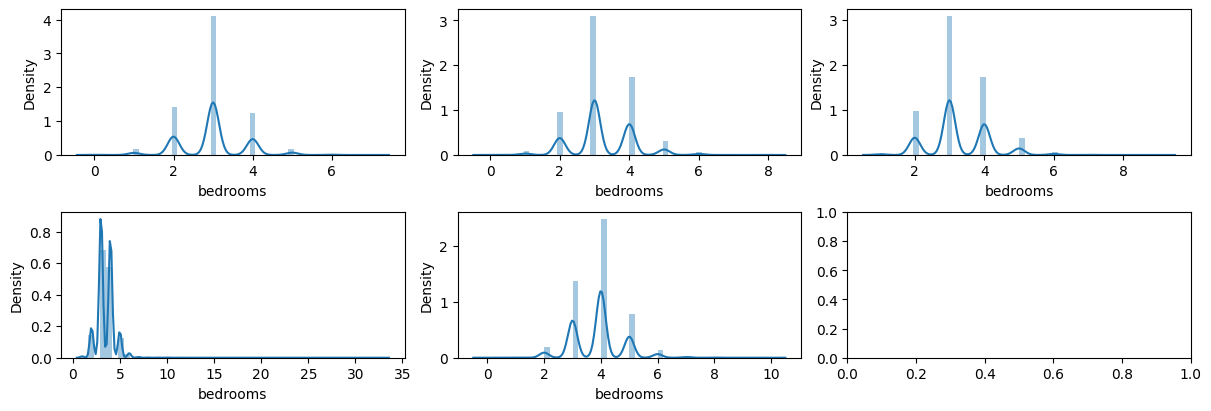

In [18]:
# 주택 가격 - 침실 개수 분석
fig5, axs5 = plt.subplots(2, 3, figsize = (12, 4), constrained_layout = True)

sns.distplot(house_df['bedrooms'].loc[house_df['price_class'] == 0], ax = axs5[0, 0])
sns.distplot(house_df['bedrooms'].loc[house_df['price_class'] == 1], ax = axs5[0, 1])
sns.distplot(house_df['bedrooms'].loc[house_df['price_class'] == 2], ax = axs5[0, 2])
sns.distplot(house_df['bedrooms'].loc[house_df['price_class'] == 3], ax = axs5[1, 0])
sns.distplot(house_df['bedrooms'].loc[house_df['price_class'] == 4], ax = axs5[1, 1])

<ipython-input-19-976e41957b26>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['sqft_living'].loc[house_df['price_class'] == 0], ax = axs5[0, 0])
<ipython-input-19-976e41957b26>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['sqft_living'].loc[house_df['price_class'] == 1],

<Axes: xlabel='sqft_living', ylabel='Density'>

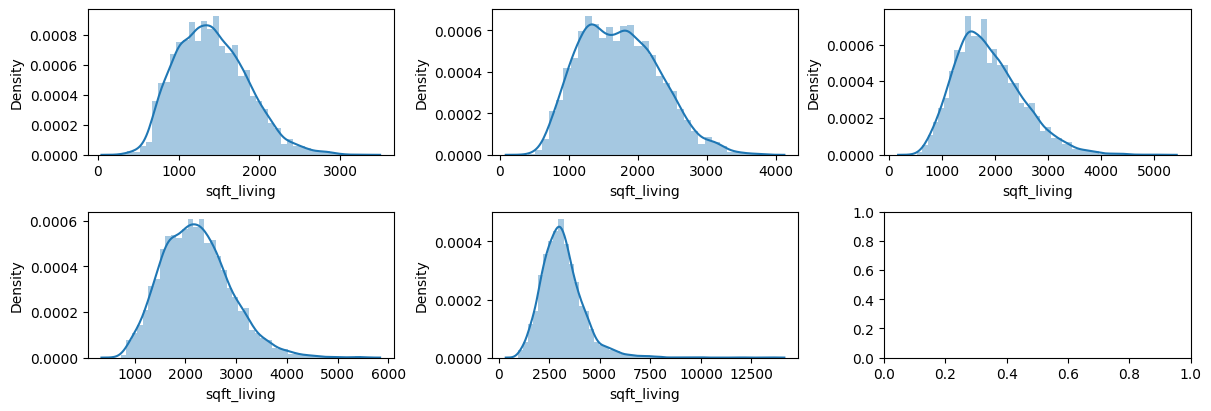

In [19]:
# 주택 가격 - 주택 면적 분석
fig5, axs5 = plt.subplots(2, 3, figsize = (12, 4), constrained_layout = True)

sns.distplot(house_df['sqft_living'].loc[house_df['price_class'] == 0], ax = axs5[0, 0])
sns.distplot(house_df['sqft_living'].loc[house_df['price_class'] == 1], ax = axs5[0, 1])
sns.distplot(house_df['sqft_living'].loc[house_df['price_class'] == 2], ax = axs5[0, 2])
sns.distplot(house_df['sqft_living'].loc[house_df['price_class'] == 3], ax = axs5[1, 0])
sns.distplot(house_df['sqft_living'].loc[house_df['price_class'] == 4], ax = axs5[1, 1])

## **6. T 검정**
강변 전망인 주택과 아닌 주택의 평균 가격이 비슷한지 확인한다. 이때 영가설은 '강변 전망인 주택과 아닌 주택의 평균 가격은 같다'이고, 대립가설은 '강변 전망인 주택과 아닌 주택의 평균 가격은 같지 않다'이다. T 검정 결과 유의 확률은 0으로 유의 수준인 0.05보다 작으므로 대립가설이 선택된다. 따라서 강변 전망인 주택과 아닌 주택의 평균 가격은 같지 않다. </br>

In [20]:
from scipy.stats import ttest_ind

# 강변 전망인 주택의 가격 정보 추출
waterfront_price = house_df[house_df['waterfront'] == 1]['price']

# 강변 전망이 아닌 주택의 가격 정보 추출
nonwaterfront_price = house_df[house_df['waterfront'] == 0]['price']

# 두 표본의 유의 확률 계산
_, p_value = ttest_ind(waterfront_price, nonwaterfront_price)
print(f'유의 확률 = {p_value}')

# 유의 수준 선택 (0.05)
a = 0.05

# 유의 확률과 유의 수준 비교
if p_value < a:
  print('강변 전망인 주택과 아닌 주택의 평균 가격은 같지 않다.')
else:
  print('강변 전망인 주택과 아닌 주택의 평균 가격은 같다.')

유의 확률 = 0.0
강변 전망인 주택과 아닌 주택의 평균 가격은 같지 않다.


## **7. 회귀분석 및 상관분석**
가격과 주택 구분 번호를 제외한 모든 변수를 독립 변수로, 가격을 종속 변수로 두고 다중선형회귀분석 진행한다. 이때 학습 데이터와 테스트 데이터의 비율은 8 : 2이다. 성능 평가 결과 rmse가 약 212539으로 나온다.</br>
다음으로 가격과 주택 정보 간 상관분석을 진행한다. 상관계수가 0.3 이상이거나 -0.3 이하이면 상관관계가 있다고 할 때 가격은 욕실과 침실 개수, 주택 등급, 위도, 지하실 제외 면적과 지하실 면적, 주택 면적, 근방 15 가구의 주택 면적 평균, 전망 점수와 상관관계가 있다는 것을 알 수 있다.

In [21]:
# 회귀 분석

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 준비
house_df2 = house_df_org.copy(deep = True)

# 독립 변수 및 종속 변수 지정
x = house_df2[house_df2.columns.difference(['price', 'id'])].select_dtypes(np.number)
y = house_df2['price']

# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# 다중선형회귀 수행
model = LinearRegression()
model.fit(x_train, y_train)

# 성능 평가
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f"mse = {mse}")
print(f"rmse = {rmse}")

mse = 45173046132.78918
rmse = 212539.51663817526


In [22]:
# 상관분석

corrs = x.corrwith(y)
corrs

correlation = []
noncorrelation = []

for column in x:
  if corrs[column] >= 0.3 or corrs[column] <= -0.3:
    correlation.append(column)
  else:
    noncorrelation.append(column)

print('가격과의 상관계수')
print(corrs)
print(f'\n가격과 상관관계가 있는 변수 ({len(correlation)}) = {correlation}')
print(f'가격과 상관관계가 없는 변수 ({len(noncorrelation)}) = {noncorrelation}')

가격과의 상관계수
bathrooms        0.525138
bedrooms         0.308350
condition        0.036362
floors           0.256794
grade            0.667434
lat              0.307003
long             0.021626
sqft_above       0.605567
sqft_basement    0.323816
sqft_living      0.702035
sqft_living15    0.585379
sqft_lot         0.089661
sqft_lot15       0.082447
view             0.397293
waterfront       0.266369
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
dtype: float64

가격과 상관관계가 있는 변수 (9) = ['bathrooms', 'bedrooms', 'grade', 'lat', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'view']
가격과 상관관계가 없는 변수 (9) = ['condition', 'floors', 'long', 'sqft_lot', 'sqft_lot15', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode']


## **8. K-최근접 이웃**
K-최근접 이웃을 이용해 주택 정보에 따른 가격을 예측한다. 이를 위해 연속형 변수인 가격을 범주형 변수로 재구조화한다. 이때 이때 학습 데이터와 테스트 데이터의 비율은 8 : 2이다.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# 독립 변수 및 종속 변수 지정
x2 = house_df2[house_df2.columns.difference(['price', 'id'])].select_dtypes(np.number)
y2 = pd.qcut(house_df2.price, 4, labels =[0, 1, 2, 3])     # 가격을 4개의 동일한 개수로 구간화 (0 - 3)

# 데이터 분리
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

# K-NN 수행
K_NN_model = KNeighborsClassifier()
K_NN_model.fit(x_train2, y_train2)

# 성능 평가
y_predict2 = K_NN_model.predict(x_test2)
print(classification_report(y_test2, y_predict2))

              precision    recall  f1-score   support

           0       0.49      0.64      0.56      1065
           1       0.34      0.35      0.35      1071
           2       0.37      0.32      0.35      1067
           3       0.69      0.56      0.62      1120

    accuracy                           0.47      4323
   macro avg       0.47      0.47      0.47      4323
weighted avg       0.48      0.47      0.47      4323



## **9. 결론**
가격은 욕실과 침실 개수, 주택 등급, 위도, 지하실 제외와 지하실 면적, 주택 면적, 근방 15 가구의 주택 면적 평균, 전망 점수와 상관 관계를 가진다. </br>
특히 욕실 개수가 많고 주택 등급이 높으며 주택 면적이 넓을수록 가격이 높다. </br>